In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

##### Exercise 11.1

In [2]:
# Superparameters
n_epochs = [10, 20, 40]
n_training_data = [1e2, 1e3, 1e4]
noise = [0, 0.2, 0.5]
np.random.seed(0)

a = 2
b = 1

# Generate training inputs
in_validation = np.random.uniform(-1, 1, 10)
in_validation.sort()

In [3]:
class linear_fit_neural_network:
    def __init__(self, n_epochs, n_training_data, noise):
        self.epochs = n_epochs
        self.n_training_data = int(n_training_data)
        self.noise = noise
        self.network = Sequential()
        self.in_training = np.random.uniform(-1, 1, self.n_training_data)
        self.out_training = np.random.normal(a * self.in_training + b, self.noise)
        self.out_validation = np.random.normal(a * in_validation + b, self.noise)

In [4]:
out_target = a * in_validation + b
# This is the data set that the machine should learn to calculate.

###### Definition of the neural networks

In [5]:
from itertools import product

models = [linear_fit_neural_network(i, j, k) for i, j, k in product(n_epochs, n_training_data, noise)]
for model in models:
    model.network.add(Dense(1, input_shape = (1,)))

###### Training

In [6]:
model_histories = []
for model in models:
    # Compile the model choosing the optimizer, loss and metrics objects.
    model.network.compile(optimizer = "sgd", loss = "mse", metrics = ["mse"])

    # Evaluate the model using the "training" dataset,
    # over 10 epochs of 32 batch size each
    model_histories.append(model.network.fit(
        x = model.in_training,
        y = model.out_training,
        batch_size = 32,
        epochs = model.epochs,
        shuffle = True, # It is a good idea to shuffle the input before each epoch.
        validation_data = (in_validation, model.out_validation)
    ))

Train on 100 samples, validate on 10 samples
Epoch 1/10
100/100 [==============================] - 0s 5ms/step - loss: 4.1738 - mean_squared_error: 4.1738 - val_loss: 4.0647 - val_mean_squared_error: 4.0647
Epoch 2/10
100/100 [==============================] - 0s 33us/step - loss: 3.8472 - mean_squared_error: 3.8472 - val_loss: 3.7632 - val_mean_squared_error: 3.7632
Epoch 3/10
100/100 [==============================] - 0s 34us/step - loss: 3.6140 - mean_squared_error: 3.6140 - val_loss: 3.5356 - val_mean_squared_error: 3.5356
Epoch 4/10
100/100 [==============================] - 0s 35us/step - loss: 3.4253 - mean_squared_error: 3.4253 - val_loss: 3.2988 - val_mean_squared_error: 3.2988
Epoch 5/10
100/100 [==============================] - 0s 34us/step - loss: 3.2198 - mean_squared_error: 3.2198 - val_loss: 3.0234 - val_mean_squared_error: 3.0234
Epoch 6/10
100/100 [==============================] - 0s 40us/step - loss: 3.0088 - mean_squared_error: 3.0088 - val_loss: 2.8643 - val_mean_

1000/1000 [==============================] - 0s 15us/step - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.0301 - val_mean_squared_error: 0.0301
Epoch 10/10
1000/1000 [==============================] - 0s 15us/step - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Train on 1000 samples, validate on 10 samples
Epoch 1/10
1000/1000 [==============================] - 0s 303us/step - loss: 0.9727 - mean_squared_error: 0.9727 - val_loss: 0.7639 - val_mean_squared_error: 0.7639
Epoch 2/10
1000/1000 [==============================] - 0s 15us/step - loss: 0.5044 - mean_squared_error: 0.5044 - val_loss: 0.4215 - val_mean_squared_error: 0.4215
Epoch 3/10
1000/1000 [==============================] - 0s 15us/step - loss: 0.3538 - mean_squared_error: 0.3538 - val_loss: 0.2874 - val_mean_squared_error: 0.2874
Epoch 4/10
1000/1000 [==============================] - 0s 15us/step - loss: 0.2982 - mean_squared_error: 0.2982 - val_loss: 0.2279 - val_

100/100 [==============================] - 0s 42us/step - loss: 0.5482 - mean_squared_error: 0.5482 - val_loss: 0.5730 - val_mean_squared_error: 0.5730
Epoch 7/20
100/100 [==============================] - 0s 35us/step - loss: 0.4679 - mean_squared_error: 0.4679 - val_loss: 0.4916 - val_mean_squared_error: 0.4916
Epoch 8/20
100/100 [==============================] - 0s 35us/step - loss: 0.4021 - mean_squared_error: 0.4021 - val_loss: 0.4288 - val_mean_squared_error: 0.4288
Epoch 9/20
100/100 [==============================] - 0s 34us/step - loss: 0.3515 - mean_squared_error: 0.3515 - val_loss: 0.3756 - val_mean_squared_error: 0.3756
Epoch 10/20
100/100 [==============================] - 0s 39us/step - loss: 0.3085 - mean_squared_error: 0.3085 - val_loss: 0.3260 - val_mean_squared_error: 0.3260
Epoch 11/20
100/100 [==============================] - 0s 34us/step - loss: 0.2688 - mean_squared_error: 0.2688 - val_loss: 0.2829 - val_mean_squared_error: 0.2829
Epoch 12/20
100/100 [==========

100/100 [==============================] - 0s 36us/step - loss: 0.4114 - mean_squared_error: 0.4114 - val_loss: 0.4518 - val_mean_squared_error: 0.4518
Epoch 16/20
100/100 [==============================] - 0s 36us/step - loss: 0.3962 - mean_squared_error: 0.3962 - val_loss: 0.4282 - val_mean_squared_error: 0.4282
Epoch 17/20
100/100 [==============================] - 0s 37us/step - loss: 0.3777 - mean_squared_error: 0.3777 - val_loss: 0.4147 - val_mean_squared_error: 0.4147
Epoch 18/20
100/100 [==============================] - 0s 36us/step - loss: 0.3668 - mean_squared_error: 0.3668 - val_loss: 0.4031 - val_mean_squared_error: 0.4031
Epoch 19/20
100/100 [==============================] - 0s 35us/step - loss: 0.3574 - mean_squared_error: 0.3574 - val_loss: 0.3892 - val_mean_squared_error: 0.3892
Epoch 20/20
100/100 [==============================] - 0s 36us/step - loss: 0.3461 - mean_squared_error: 0.3461 - val_loss: 0.3774 - val_mean_squared_error: 0.3774
Train on 1000 samples, valid

1000/1000 [==============================] - 0s 17us/step - loss: 0.8521 - mean_squared_error: 0.8521 - val_loss: 0.4462 - val_mean_squared_error: 0.4462
Epoch 4/20
1000/1000 [==============================] - 0s 16us/step - loss: 0.6233 - mean_squared_error: 0.6233 - val_loss: 0.3633 - val_mean_squared_error: 0.3633
Epoch 5/20
1000/1000 [==============================] - 0s 17us/step - loss: 0.4896 - mean_squared_error: 0.4896 - val_loss: 0.3305 - val_mean_squared_error: 0.3305
Epoch 6/20
1000/1000 [==============================] - 0s 16us/step - loss: 0.4036 - mean_squared_error: 0.4036 - val_loss: 0.3195 - val_mean_squared_error: 0.3195
Epoch 7/20
1000/1000 [==============================] - 0s 16us/step - loss: 0.3462 - mean_squared_error: 0.3462 - val_loss: 0.3222 - val_mean_squared_error: 0.3222
Epoch 8/20
1000/1000 [==============================] - 0s 16us/step - loss: 0.3113 - mean_squared_error: 0.3113 - val_loss: 0.3284 - val_mean_squared_error: 0.3284
Epoch 9/20
1000/1000 

10000/10000 [==============================] - 0s 14us/step - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.0547 - val_mean_squared_error: 0.0547
Epoch 10/20
10000/10000 [==============================] - 0s 14us/step - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.0540 - val_mean_squared_error: 0.0540
Epoch 11/20
10000/10000 [==============================] - 0s 14us/step - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.0535 - val_mean_squared_error: 0.0535
Epoch 12/20
10000/10000 [==============================] - 0s 15us/step - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.0543 - val_mean_squared_error: 0.0543
Epoch 13/20
10000/10000 [==============================] - 0s 15us/step - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.0547 - val_mean_squared_error: 0.0547
Epoch 14/20
10000/10000 [==============================] - 0s 15us/step - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.0548 - val_mean_squared_error: 0.0548
Epoc

Epoch 18/40
100/100 [==============================] - 0s 37us/step - loss: 0.0959 - mean_squared_error: 0.0959 - val_loss: 0.1109 - val_mean_squared_error: 0.1109
Epoch 19/40
100/100 [==============================] - 0s 38us/step - loss: 0.0846 - mean_squared_error: 0.0846 - val_loss: 0.0969 - val_mean_squared_error: 0.0969
Epoch 20/40
100/100 [==============================] - 0s 38us/step - loss: 0.0746 - mean_squared_error: 0.0746 - val_loss: 0.0874 - val_mean_squared_error: 0.0874
Epoch 21/40
100/100 [==============================] - 0s 38us/step - loss: 0.0677 - mean_squared_error: 0.0677 - val_loss: 0.0780 - val_mean_squared_error: 0.0780
Epoch 22/40
100/100 [==============================] - 0s 38us/step - loss: 0.0611 - mean_squared_error: 0.0611 - val_loss: 0.0710 - val_mean_squared_error: 0.0710
Epoch 23/40
100/100 [==============================] - 0s 39us/step - loss: 0.0561 - mean_squared_error: 0.0561 - val_loss: 0.0642 - val_mean_squared_error: 0.0642
Epoch 24/40
100/

Epoch 28/40
100/100 [==============================] - 0s 35us/step - loss: 0.4125 - mean_squared_error: 0.4125 - val_loss: 0.2942 - val_mean_squared_error: 0.2942
Epoch 29/40
100/100 [==============================] - 0s 37us/step - loss: 0.3880 - mean_squared_error: 0.3880 - val_loss: 0.2852 - val_mean_squared_error: 0.2852
Epoch 30/40
100/100 [==============================] - 0s 36us/step - loss: 0.3657 - mean_squared_error: 0.3657 - val_loss: 0.2693 - val_mean_squared_error: 0.2693
Epoch 31/40
100/100 [==============================] - 0s 36us/step - loss: 0.3445 - mean_squared_error: 0.3445 - val_loss: 0.2522 - val_mean_squared_error: 0.2522
Epoch 32/40
100/100 [==============================] - 0s 37us/step - loss: 0.3249 - mean_squared_error: 0.3249 - val_loss: 0.2372 - val_mean_squared_error: 0.2372
Epoch 33/40
100/100 [==============================] - 0s 35us/step - loss: 0.3074 - mean_squared_error: 0.3074 - val_loss: 0.2226 - val_mean_squared_error: 0.2226
Epoch 34/40
100/

Epoch 38/40
100/100 [==============================] - 0s 40us/step - loss: 0.8898 - mean_squared_error: 0.8898 - val_loss: 0.4864 - val_mean_squared_error: 0.4864
Epoch 39/40
100/100 [==============================] - 0s 40us/step - loss: 0.8583 - mean_squared_error: 0.8583 - val_loss: 0.4792 - val_mean_squared_error: 0.4792
Epoch 40/40
100/100 [==============================] - 0s 38us/step - loss: 0.8290 - mean_squared_error: 0.8290 - val_loss: 0.4745 - val_mean_squared_error: 0.4745
Train on 1000 samples, validate on 10 samples
Epoch 1/40
1000/1000 [==============================] - 1s 594us/step - loss: 3.8552 - mean_squared_error: 3.8552 - val_loss: 2.4086 - val_mean_squared_error: 2.4086
Epoch 2/40
1000/1000 [==============================] - 0s 18us/step - loss: 2.2812 - mean_squared_error: 2.2812 - val_loss: 1.2865 - val_mean_squared_error: 1.2865
Epoch 3/40
1000/1000 [==============================] - 0s 17us/step - loss: 1.4258 - mean_squared_error: 1.4258 - val_loss: 0.7535

Epoch 5/40
1000/1000 [==============================] - 0s 16us/step - loss: 0.2730 - mean_squared_error: 0.2730 - val_loss: 0.1855 - val_mean_squared_error: 0.1855
Epoch 6/40
1000/1000 [==============================] - 0s 16us/step - loss: 0.1939 - mean_squared_error: 0.1939 - val_loss: 0.1302 - val_mean_squared_error: 0.1302
Epoch 7/40
1000/1000 [==============================] - 0s 17us/step - loss: 0.1419 - mean_squared_error: 0.1419 - val_loss: 0.0946 - val_mean_squared_error: 0.0946
Epoch 8/40
1000/1000 [==============================] - 0s 17us/step - loss: 0.1073 - mean_squared_error: 0.1073 - val_loss: 0.0696 - val_mean_squared_error: 0.0696
Epoch 9/40
1000/1000 [==============================] - 0s 18us/step - loss: 0.0841 - mean_squared_error: 0.0841 - val_loss: 0.0534 - val_mean_squared_error: 0.0534
Epoch 10/40
1000/1000 [==============================] - 0s 17us/step - loss: 0.0691 - mean_squared_error: 0.0691 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 11/

1000/1000 [==============================] - 0s 17us/step - loss: 0.2475 - mean_squared_error: 0.2475 - val_loss: 0.1650 - val_mean_squared_error: 0.1650
Epoch 15/40
1000/1000 [==============================] - 0s 18us/step - loss: 0.2474 - mean_squared_error: 0.2474 - val_loss: 0.1621 - val_mean_squared_error: 0.1621
Epoch 16/40
1000/1000 [==============================] - 0s 17us/step - loss: 0.2473 - mean_squared_error: 0.2473 - val_loss: 0.1643 - val_mean_squared_error: 0.1643
Epoch 17/40
1000/1000 [==============================] - 0s 17us/step - loss: 0.2471 - mean_squared_error: 0.2471 - val_loss: 0.1654 - val_mean_squared_error: 0.1654
Epoch 18/40
1000/1000 [==============================] - 0s 17us/step - loss: 0.2471 - mean_squared_error: 0.2471 - val_loss: 0.1641 - val_mean_squared_error: 0.1641
Epoch 19/40
1000/1000 [==============================] - 0s 17us/step - loss: 0.2470 - mean_squared_error: 0.2470 - val_loss: 0.1623 - val_mean_squared_error: 0.1623
Epoch 20/40
1000

10000/10000 [==============================] - 0s 15us/step - loss: 1.0074e-11 - mean_squared_error: 1.0074e-11 - val_loss: 4.8580e-12 - val_mean_squared_error: 4.8580e-12
Epoch 22/40
10000/10000 [==============================] - 0s 15us/step - loss: 1.0056e-11 - mean_squared_error: 1.0056e-11 - val_loss: 4.8580e-12 - val_mean_squared_error: 4.8580e-12
Epoch 23/40
10000/10000 [==============================] - 0s 15us/step - loss: 1.0056e-11 - mean_squared_error: 1.0056e-11 - val_loss: 4.8580e-12 - val_mean_squared_error: 4.8580e-12
Epoch 24/40
10000/10000 [==============================] - 0s 15us/step - loss: 1.0056e-11 - mean_squared_error: 1.0056e-11 - val_loss: 4.8580e-12 - val_mean_squared_error: 4.8580e-12
Epoch 25/40
10000/10000 [==============================] - 0s 15us/step - loss: 1.0056e-11 - mean_squared_error: 1.0056e-11 - val_loss: 4.8580e-12 - val_mean_squared_error: 4.8580e-12
Epoch 26/40
10000/10000 [==============================] - 0s 15us/step - loss: 1.0056e-11 -

Epoch 28/40
10000/10000 [==============================] - 0s 15us/step - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 29/40
10000/10000 [==============================] - 0s 15us/step - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 30/40
10000/10000 [==============================] - 0s 16us/step - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 31/40
10000/10000 [==============================] - 0s 15us/step - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 32/40
10000/10000 [==============================] - 0s 15us/step - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 33/40
10000/10000 [==============================] - 0s 15us/step - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0288 - val_mean_squared_error:

10000/10000 [==============================] - 0s 15us/step - loss: 0.2481 - mean_squared_error: 0.2481 - val_loss: 0.6304 - val_mean_squared_error: 0.6304
Epoch 37/40
10000/10000 [==============================] - 0s 15us/step - loss: 0.2480 - mean_squared_error: 0.2480 - val_loss: 0.6187 - val_mean_squared_error: 0.6187
Epoch 38/40
10000/10000 [==============================] - 0s 15us/step - loss: 0.2482 - mean_squared_error: 0.2482 - val_loss: 0.6210 - val_mean_squared_error: 0.6210
Epoch 39/40
10000/10000 [==============================] - 0s 16us/step - loss: 0.2481 - mean_squared_error: 0.2481 - val_loss: 0.6198 - val_mean_squared_error: 0.6198
Epoch 40/40
10000/10000 [==============================] - 0s 15us/step - loss: 0.2481 - mean_squared_error: 0.2481 - val_loss: 0.6193 - val_mean_squared_error: 0.6193


###### Evaluation on test data and predictions

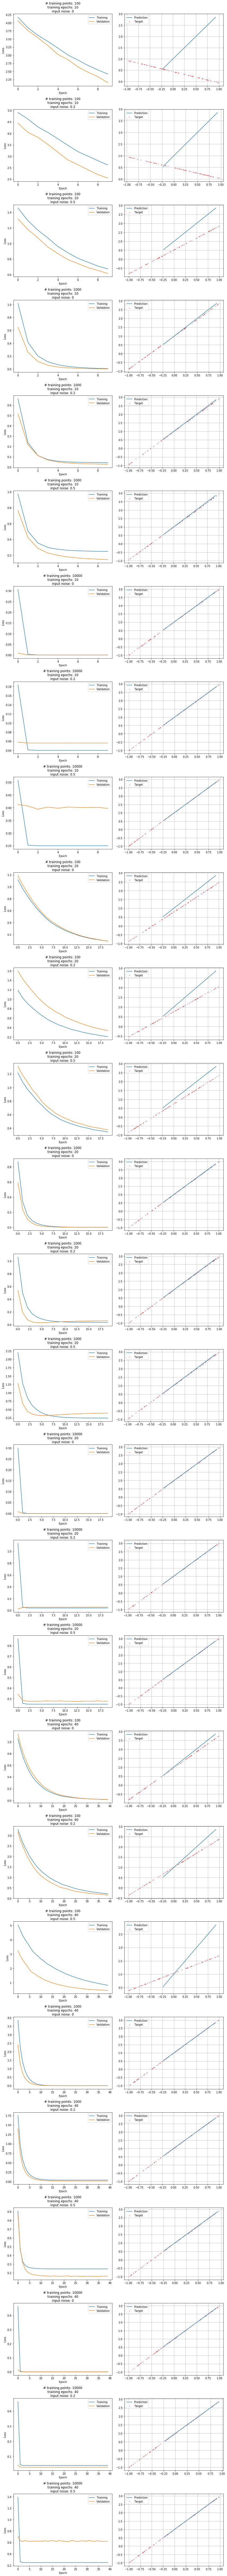

In [7]:
# look into training history
# Plot training & validation loss values
n_plot_types = 2
fig, axes = plt.subplots(nrows = len(models), ncols = n_plot_types, figsize = (12, len(models) * 5))
axes = axes.flatten()

for i, (model, history) in enumerate(zip(models, model_histories)):
    axes[n_plot_types * i].plot(history.history["loss"])
    axes[n_plot_types * i].plot(history.history["val_loss"])
    axes[n_plot_types * i].set_title(
        "# training points: " + str(model.n_training_data)
        + "\ntraining epochs: " + str(model.epochs)
        + "\ninput noise: " + str(model.noise)
    )
    axes[n_plot_types * i].set_ylabel("Loss")
    axes[n_plot_types * i].set_xlabel("Epoch")
    axes[n_plot_types * i].legend(["Training", "Validation"], loc = "best")
    
    in_predicted = np.random.uniform(-1, 1, 100)
    out_predicted = model.network.predict(in_predicted)
    axes[n_plot_types * i + 1].scatter(in_predicted, out_predicted, color = "red", s = 1)
    axes[n_plot_types * i + 1].plot(in_validation, out_target)
    axes[n_plot_types * i + 1].legend(["Prediction", "Target"], loc = "best")
    # in_target == in_validation
    axes[n_plot_types * i + 1].grid(True)

fig.tight_layout()
plt.show()

###### Comments
A training data set of just 100 elements is certainly not enough to get a decent result: the predictions for this sample size are way off, and it seems that the accuracy levels did not even converge to a stable value. 1000 elements are better, but there is still room for improvement, particularly when the network is trained for fewer epochs. In fact, a training set of 10000 elements leads to good results in all the above cases, regardless of the epochs and the noise level I set.

It does not come as a surprise that in the absence of noise in the input data the accuracy of the network *both in the training and in the validation runs* dropped to zero very quickly: after all, the overfitting problem does not apply in this case.
When a positive noise is applied to the training data, however, there *is* a difference in the accuracy between the training and validation runs.

Judging from how the accuracy plots (except for the models with just 100 input points) saturate after more or less twenty epochs of training, I would say that forty epochs are too many. In fact, after less than ten epochs the validation accuracy rises to a higher value than the testing accuracy, and stabilizes at such value. It seems pointless to me to continue training at this point.
This problem is less evident when 10000 input samples are provided.
A total of thirty training epochs may be a good compromise to obtain nice results without a too high computational time.